# Pxy and xy Diagrams for Binary Mixtures


## Introduction

For a binary mixture at a fixed temperature, the pressure/composition (Px) diagram plots the equilibrium composition of the liquid and vapor as a function of pressure.  


## Analysis

First, we give the values to $x_A$ : ($0<x_A<1$)

The basic calculations start with Raoult's law

$$P = x_A P_A^{sat}(T) + x_B P_A^{sat}(T)$$

substituting $x_B = 1-x_A$

$$P = x_A P_A^{sat}(T) + (1-x_A) P_B^{sat}(T)$$

then solving for $x_A$ and $y_A$

$$y_A = x_A\frac{P_A^{sat}(T)}{P}$$

## Plotting the Pxy Diagram


In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


The calculations in this notebook are for a representative system of two components, acetonitrile and nitromethane. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [48]:
# Antoine's equations
A = 'acetonitrile'
B = 'nitromethane'

def PsatA(T):
    return np.exp(14.2724 - 2945.47/(T + 224))

def PsatB(T):
    return np.exp(14.2043 - 2972.64/(T + 209))

For convenience, we create a function that computes the boiling pressure of a pure component given the operating temperature and a function to compute the pure component saturation pressure.

In [49]:
from scipy.optimize import brentq

print ("Normal boiling pressure point of {:s} is {:4.1f} kPa".format(A,PsatA(75)))
print ("Normal boiling pressure point of {:s} is {:4.1f} kPa".format(B,PsatB(75)))

Normal boiling pressure point of acetonitrile is 83.2 kPa
Normal boiling pressure point of nitromethane is 42.0 kPa


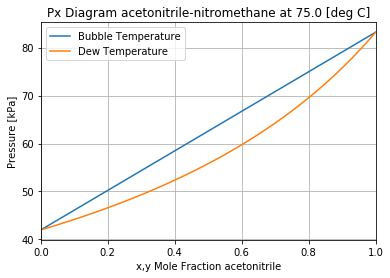

In [50]:
global T
T = 75 

xA = np.linspace(0,1)

def P(x):
    return PsatB(T)+(PsatA(T)-PsatB(T))*x

def y(x):
    return (x*PsatA(T))/P(x)


plt.plot(xA, P(xA),y(xA),P(xA))
plt.title('Px Diagram {:s}-{:s} at {:.1f} [deg C]'.format(A,B,T))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Pressure [kPa]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

## xy Diagram

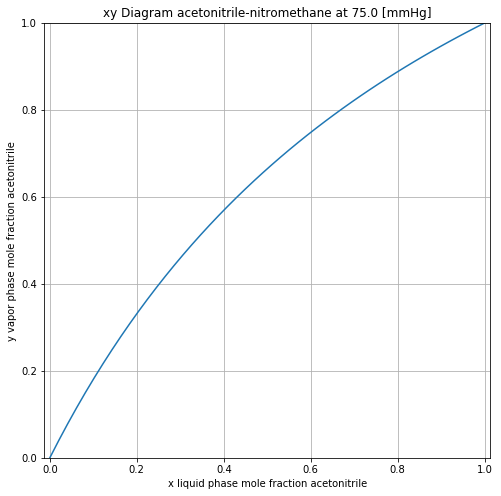

In [41]:
plt.figure(figsize=(8,8))

plt.plot(xA, y(xA))
plt.axis('equal')
plt.title('xy Diagram {:s}-{:s} at {:.1f} [mmHg]'.format(A,B,T))
plt.xlabel('x liquid phase mole fraction {:s}'.format(A))
plt.ylabel('y vapor phase mole fraction {:s}'.format(A))
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid();

## Lever Rule

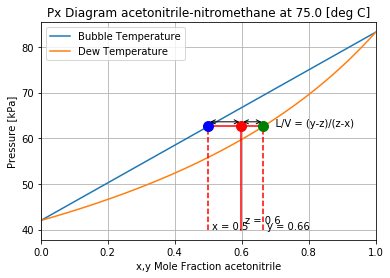

In [46]:
plt.plot(xA, P(xA),y(xA),P(xA))
plt.title('Px Diagram {:s}-{:s} at {:.1f} [deg C]'.format(A,B,T))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Pressure [kPa]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

xe = np.mean(xA)
ye = y(xe)
Pe = P(xe)
ze = 0.4*xe + 0.6*ye

ax = plt.axis()
plt.plot([ze,ze],[ax[2],Pe],'r')
plt.plot([xe,ye],[Pe,Pe],'r')
plt.plot([xe,xe],[ax[2],Pe],'r--',[ye,ye],[ax[2],Pe],'r--')

plt.text(xe+0.01,ax[2]+0.2,'x = {:.2}'.format(xe))
plt.text(ye+0.01,ax[2]+0.2,'y = {:.2}'.format(ye))
plt.text(ze+0.01,ax[2]+1.5,'z = {:.2}'.format(ze))

plt.annotate('', (xe,Pe+1), (ze,Pe+1), arrowprops={'arrowstyle':'<->'})
plt.annotate('', (ze,Pe+1), (ye,Pe+1), arrowprops={'arrowstyle':'<->'})

plt.annotate('    L/V = (y-z)/(z-x)',(ye,Pe))

plt.plot(xe,Pe,'bo',ms = 10)
plt.plot(ye,Pe,'go',ms = 10)
plt.plot(ze,Pe,'ro',ms = 10)
